In [1]:
'''Source 
https://sdsclub.com/applying-artificial-neural-networks-anns-for-linear-regression-yay-or-nay/'''

'Source \nhttps://sdsclub.com/applying-artificial-neural-networks-anns-for-linear-regression-yay-or-nay/'

# Linear Regression Using Tensorflow

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
#Sets the global random seed.
np.random.seed(101)
tf.random.set_seed(101)

In [88]:
'''Generate random linear data'''
x=np.linspace(0,50,50)
y=np.linspace(0,50,50)

'''add some noise to the data'''
x+=np.random.uniform(-4,4,50)
y+=np.random.uniform(-4,4,50)

n=len(x)#Number of data points

Text(0.5, 1.0, 'training data')

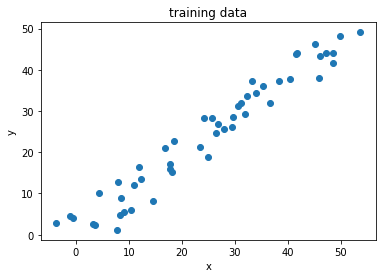

In [89]:
'''plot data'''
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data')

In [32]:
'''original code was using tf1 and not tf2'''
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder("float")
Y = tf.placeholder("float")

Instructions for updating:
non-resource variables are not supported in the long term


In [33]:
W =tf.Variable(np.random.randn(), name='W')
b =tf.Variable(np.random.randn(), name='b')

In [43]:
learning_rate=0.01
training_epochs=1000

In [40]:
# Hypothesis
y_pred = tf.add(tf.multiply(X,W),b)

# Mean Squared Error Cost function
cost= tf.reduce_sum(tf.pow(y_pred-Y,2))/(2 * n)

# Gradient Descent optimizer
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    #initializing variables
    sess.run(init)
    
    #iterating through all epochs
    for epoch in range(training_epochs):
        for (_x,_y)in zip (x,y):
            sess.run(optimizer, feed_dict = {X:_x, Y:_y})
        if (epoch +1) % 50==0:
            c=sess.run(cost, feed_dict={X:x,Y:y})
            print ("Epoch", (epoch + 1), ":cost=",c,
                   "W=", sess.run(W),
                  "b=", sess.run(b))
    training_cost=sess.run(cost,feed_dict={X:x,Y:y})
    weight = sess.run(W)
    bias=sess.run(b)
    
                                

Epoch 50 :cost= 5.9889617 W= 1.0130897 b= -0.31213334
Epoch 100 :cost= 5.9846263 W= 1.0118152 b= -0.24954872
Epoch 150 :cost= 5.9818363 W= 1.010674 b= -0.1935087
Epoch 200 :cost= 5.9802117 W= 1.009652 b= -0.14332935
Epoch 250 :cost= 5.9794636 W= 1.0087371 b= -0.09839738
Epoch 300 :cost= 5.979356 W= 1.0079178 b= -0.05816405
Epoch 350 :cost= 5.9797087 W= 1.007184 b= -0.02213798
Epoch 400 :cost= 5.9803886 W= 1.0065272 b= 0.01012063
Epoch 450 :cost= 5.981286 W= 1.0059389 b= 0.03900586
Epoch 500 :cost= 5.9823246 W= 1.0054122 b= 0.06487047
Epoch 550 :cost= 5.9834423 W= 1.0049406 b= 0.08803028
Epoch 600 :cost= 5.984591 W= 1.0045183 b= 0.10876833
Epoch 650 :cost= 5.9857373 W= 1.00414 b= 0.12733771
Epoch 700 :cost= 5.986863 W= 1.0038015 b= 0.14396499
Epoch 750 :cost= 5.987949 W= 1.0034983 b= 0.15885356
Epoch 800 :cost= 5.988979 W= 1.0032268 b= 0.17218527
Epoch 850 :cost= 5.989956 W= 1.0029837 b= 0.18412285
Epoch 900 :cost= 5.990867 W= 1.002766 b= 0.19481188
Epoch 950 :cost= 5.9917164 W= 1.00257

In [97]:
# Calculating the predictions
predictions = weight * x +bias
print ("Training cost=", training_cost,
      "weight=", weight, "Bias=", bias)

Training cost= 5.9924994 weight= 1.0023965 Bias= 0.21295343


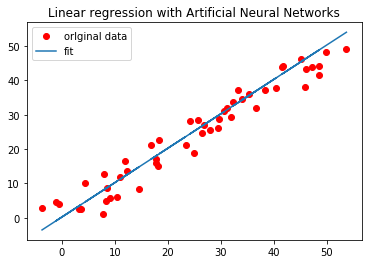

In [101]:
# plot results

plt.plot(x,y,'ro', label="orIginal data")
plt.plot(x, predictions, label='fit')
plt.title('Linear regression with Artificial Neural Networks')
plt.legend()